In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
importlib.reload(kgs)
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)
pack_cuda._ensure_initialized()


local
local
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, used 1 barriers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compile time = 20.691 ms
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas

In [2]:
%load_ext pyinstrument

In [3]:

import pack_ga3
import time
import pack_runner
runner = pack_runner.baseline_runner()
runner.base_ga.ga.do_legalize = False
runner.base_ga.ga.ga_base.do_legalize = False
runner.base_ga.ga.ga_base.N_trees_to_do = 40
runner.base_ga.n_generations = 5


Processing class: BaseClass
  Added method: BaseClass.__init__
  Added method: BaseClass._check_constraints
  Added method: BaseClass._check_types
  Added method: BaseClass.check_constraints
Processing class: SolutionCollection
  Added method: SolutionCollection.__init__
  Added method: SolutionCollection._check_constraints
  Added method: SolutionCollection._check_types
  Added method: SolutionCollection.check_constraints
  Added method: SolutionCollection.create_clone
  Added method: SolutionCollection.create_clone_batch
  Added method: SolutionCollection.create_empty
  Added method: SolutionCollection.get_crystal_axes
  Added method: SolutionCollection.get_crystal_axes_allocate
  Added method: SolutionCollection.merge
  Added method: SolutionCollection.rotate
  Added method: SolutionCollection.select_ids
Processing class: SolutionCollectionLattice
  Added method: SolutionCollectionLattice.__init__
  Added method: SolutionCollectionLattice._check_constraints
  Added method: SolutionC

/mnt/d/packing/code/analysis/../core/kaggle_support.py:232: UserWarning: Adding a function with a `.__wrapped__` attribute. You may want to profile the wrapped function by adding `snap.__wrapped__` instead.
  module_profiler.add_function(method)
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


Generation 0: Best costs = [[0.371981, 0.154761]]
Generation 1: Best costs = [[0.371981, 0.051827]]
Generation 2: Best costs = [[0.371981, 0.018069]]
Generation 3: Best costs = [[0.371981, 0.016287]]
Generation 4: Best costs = [[0.371981, 0.014463]]
Runtime: 43.4s
Elapsed time: 43.37231183052063


_     ._   __/__   _ _  _  _ _/_   Recorded: 08:45:41  Samples:  24203
 /_//_/// /_\ / //_// / //_'/ //     Duration: 43.383    CPU time: 43.284
/   _/                      v5.1.1

Cell [5]

43.383 <module>  /tmp/ipykernel_9882/3647973873.py:1
`- 43.372 Runner.run  pack_runner.py:29
   `- 43.321 Orchestrator.run  pack_ga3.py:1321
      |- 20.904 Orchestrator._relax  pack_ga3.py:1277
      |  `- 20.568 run_simulation_list  pack_dynamics.py:633
      |     `- 20.553 OptimizerBFGS.run_simulation  pack_dynamics.py:42
      |        `- 20.469 lbfgs  lbfgs_torch_parallel.py:382
      |           |- 16.985 f_torch  pack_dynamics.py:68
      |           |  `- 16.487 Device.synchronize  <built-in>
      |           `- 2.900 [self]  lbfgs_torch_parallel.py
      |- 18.092 GAMultiRing.apply_selection  pack_ga3.py:373
      |  `- 18.092 GAMultiRing._apply_selection  pack_ga3.py:552
      |     `- 18.090 GASinglePopulationOld.apply_selection  pack_ga3.py:373
      |        `- 18.088 GASinglePopulationOld._apply_selection  pack_ga3.py:998
      |           |- 13.880 compute_genetic_diversity  kaggle_support.py:1218
      |           |  `- 13.822 compute_genetic_diversity_matrix  kaggle_support.py:1071
      |           |     `- 13.790 compute_genetic_diversity_matrix_shortcut  kaggle_support.py:959
      |           |        |- 10.775 [self]  kaggle_support.py
      |           |        |- 1.339 Device.synchronize  <built-in>
      |           |        `- 0.580 amin  cupy/_statistics/order.py:10
      |           |           `- 0.550 ndarray.min  <built-in>
      |           `- 3.650 compute_genetic_diversity_matrix  kaggle_support.py:1071
      |              `- 3.650 compute_genetic_diversity_matrix_shortcut  kaggle_support.py:959
      |                 `- 3.589 Device.synchronize  <built-in>
      `- 3.315 GAMultiRing.generate_offspring  pack_ga3.py:332
         `- 3.315 GAMultiRing._generate_offspring  pack_ga3.py:621
            `- 3.271 GASinglePopulationOld.generate_offspring  pack_ga3.py:332
               `- 3.085 GASinglePopulationOld._generate_offspring  pack_ga3.py:1111
                  `- 2.886 MoveSelector.do_move_vec  pack_move.py:42
                     `- 2.886 MoveSelector._do_move_vec  pack_move.py:83
                        |- 2.260 Crossover.do_move_vec  pack_move.py:42
                        |  |- 0.584 Crossover._do_move_vec  pack_move.py:307
                        |  `- 0.570 JiggleCluster._do_move_vec  pack_move.py:171
                        `- 0.447 [self]  pack_move.py
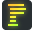

In [4]:
%%pyinstrument
kgs.profiling=True
kgs.enable_module_profiling(kgs)
t = time.time()
runner.run()
print("Elapsed time:", time.time() - t)


In [5]:
kgs.print_module_profile()


Timer unit: 1e-09 s

Total time: 0 s
File: /home/jcottaar/miniconda3/envs/rapids-25.10/lib/python3.13/site-packages/decorator.py
Function: decorate.<locals>.fun at line 232

Line #      Hits         Time  Per Hit   % Time  Line Contents
   232                                                   def fun(*args, **kw):
   233                                                       if not kwsyntax:
   234                                                           args, kw = fix(args, kw, sig)
   235                                                       return caller(func, *(extras + args), **kw)

Total time: 0 s
File: /mnt/d/packing/code/analysis/../core/kaggle_support.py
Function: assert_mps at line 43

Line #      Hits         Time  Per Hit   % Time  Line Contents
    43                                           def assert_mps():
    44                                               import subprocess
    45                                               out = subprocess.run(
    46             